<a href="https://colab.research.google.com/github/ChiaraAlba/Decision-Tree/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

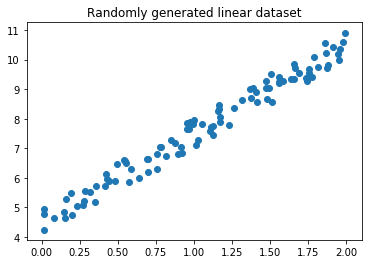

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X,y)
plt.title('Randomly generated linear dataset')
plt.show()

# Normal Equation
## Closed-form solution
This equation allows us to find the value of theta minimising the MSE (mean square error) given a linear regression hypothesis

$ \Theta_{opt} = (X^T \cdot  X)^{-1}  \cdot X^T \cdot y $



In [3]:
X_complete = np.c_[np.ones((100,1)), X]  # We add a column of ones (c_[] to add c) to X
theta_opt = np.linalg.inv(X_complete.T.dot(X_complete)).dot(X_complete.T).dot(y)
theta_opt

array([[4.55962238],
       [2.96919288]])

Our linear hypothesis was given by:

$ y = 4 + 3 x + Gaussian\,noise$

Therefore $\theta_1 = 4$ and $\theta_2 = 3$. Our optimal values for $\Theta$ are close enough.
With $\Theta_{opt}$ we can now make predictions.

In [0]:
X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]

y_predict = X_new.dot(theta_opt)

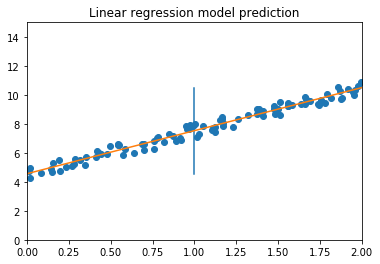

In [5]:
plt.scatter(X, y)
plt.plot(X_new, y_predict)
plt.axis([0,2,0,15])
plt.title('Linear regression model prediction')
plt.show()

###Equivalently using Scikit-Learn



In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_  # It produces separately the bias term (called intercept) and the coefficients

(array([4.55962238]), array([[2.96919288]]))

In [7]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[ 4.55962238],
       [10.49800815]])

 # Batch Gradient Descent
 
$ \Theta^{n+1} = \Theta^{n} - \eta \nabla_{\Theta}MSE(\Theta^n)$

$\eta$ is the **learning rate**

In [10]:
eta = [0.02, 0.1, 0.5]
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 

for iteration in range(n_iterations):
  gradients = 2/m * X_complete.T.dot(X_complete.dot(theta) - y)
  theta = theta - eta[1] * gradients
  
theta

array([[4.55962238],
       [2.96919288]])

#### Gradient Descent using three different values for the learning rate

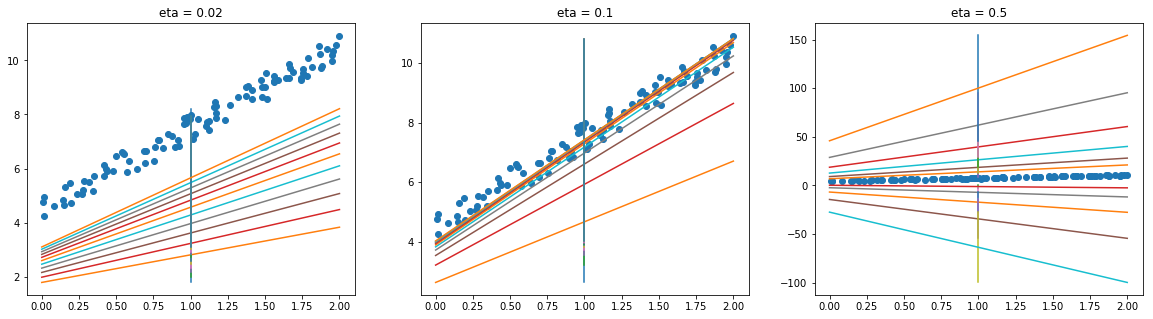

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]
theta_r = np.random.randn(2,1)

for j in range(len(eta)):
  fig = ax[j].scatter(X,y)
  theta = theta_r
  ax[j].set_title('eta = {}'.format(eta[j]))
  for iteration in range(11):
    gradients = 2/m * X_complete.T.dot(X_complete.dot(theta) - y)
    theta = theta - eta[j] * gradients
    y_predict = X_new.dot(theta)
    fig = ax[j].plot(X_new, y_predict)